# Directed Graph - Traversal

---

In [1]:
from collections import deque
from typing import List

from importnb import Notebook

from theoria.validor import TestCase, Validor

with Notebook():
    from notebooks.computer_science.data_structures.graphs.__basic__directed_graph import (
        AdjacencyListDirectedGraph,
        GraphNode,
        T,
    )

## Depth First Search (DFS)

In [2]:
class DirectedGraphDFS:
    def __call__(
        self,
        graph: AdjacencyListDirectedGraph[T],
        root: GraphNode[T],
    ) -> List[GraphNode[T]]:
        visited = set()
        result = []

        def dfs(node: GraphNode[T]) -> None:
            if node in visited:
                return

            visited.add(node)
            result.append(node)

            for neighbour in graph.adjacency_list[node]:
                dfs(neighbour)

        dfs(root)
        return result

## Breadth First Search (BFS)

In [3]:
class DirectedGraphBFS:
    def __call__(
        self,
        graph: AdjacencyListDirectedGraph[T],
        root: GraphNode[T],
    ) -> List[GraphNode[T]]:
        result = []
        queue = deque([root])
        visited = {root}

        while queue:
            node = queue.popleft()
            result.append(node)

            for neighbour in graph.adjacency_list[node]:
                if neighbour not in visited:
                    visited.add(neighbour)
                    queue.append(neighbour)

        return result

## Tests

In [4]:
def build_test_adj_graph(
    graph: AdjacencyListDirectedGraph,
    root: GraphNode,
    expected_output: List[GraphNode],
    description: str,
) -> TestCase:
    tc = TestCase(
        input_data={"graph": graph, "root": root},
        expected_output=expected_output,
        description=description,
    )
    return tc

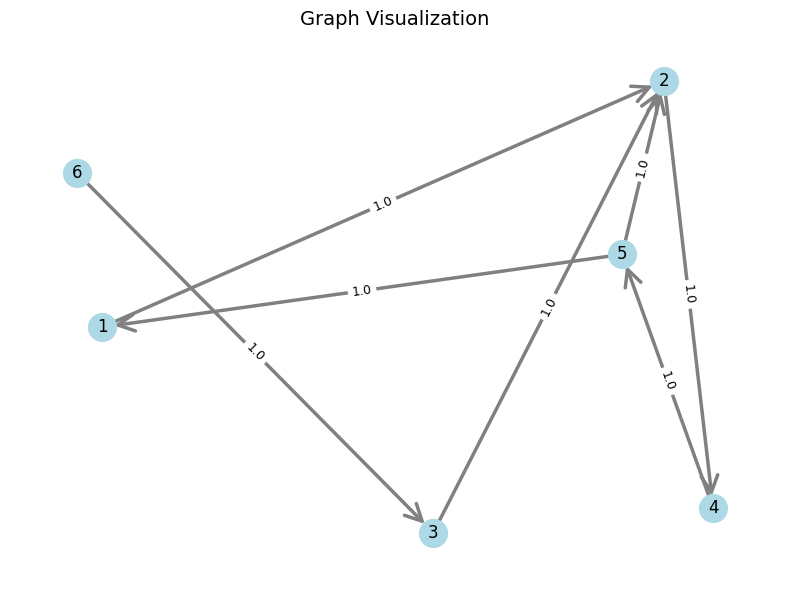

[2025-12-04 11:10:20,692] [INFO] All 1 tests passed for <__main__.DirectedGraphDFS object at 0x71a27f925d00>.
[2025-12-04 11:10:20,693] [INFO] All 1 tests passed for <__main__.DirectedGraphBFS object at 0x71a27f6206e0>.


In [5]:
# Connected directed graph
adj_graph_1 = AdjacencyListDirectedGraph(
    {
        GraphNode(1): {GraphNode(2): 1.0},
        GraphNode(2): {GraphNode(4): 1.0},
        GraphNode(3): {GraphNode(2): 1.0},
        GraphNode(4): {GraphNode(5): 1.0},
        GraphNode(5): {GraphNode(1): 1.0, GraphNode(2): 1.0},
        GraphNode(6): {GraphNode(3): 1.0},
    }
)

if __name__ == "__main__":
    adj_graph_1.visualise()

    # DFS
    Validor(DirectedGraphDFS()).add_cases(
        [
            build_test_adj_graph(
                graph=adj_graph_1,
                root=GraphNode(6),
                expected_output=[
                    GraphNode(6),
                    GraphNode(3),
                    GraphNode(2),
                    GraphNode(4),
                    GraphNode(5),
                    GraphNode(1),
                ],
                description="Connected Graph DFS",
            ),
        ],
    ).run()

    # BFS
    Validor(DirectedGraphBFS()).add_cases(
        [
            build_test_adj_graph(
                graph=adj_graph_1,
                root=GraphNode(6),
                expected_output=[
                    GraphNode(6),
                    GraphNode(3),
                    GraphNode(2),
                    GraphNode(4),
                    GraphNode(5),
                    GraphNode(1),
                ],
                description="Connected Graph BFS",
            ),
        ],
    ).run()

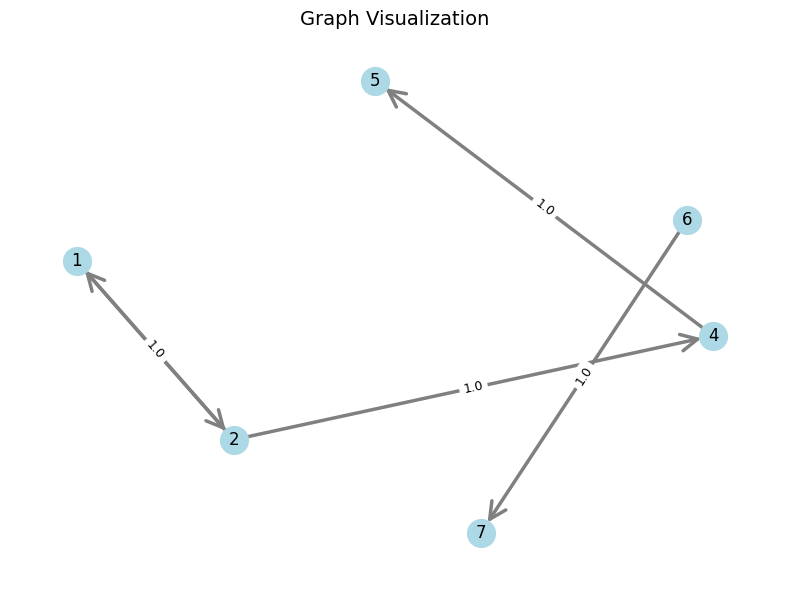

[2025-12-04 11:10:20,783] [INFO] All 1 tests passed for <__main__.DirectedGraphDFS object at 0x71a27f5cb680>.
[2025-12-04 11:10:20,784] [INFO] All 1 tests passed for <__main__.DirectedGraphBFS object at 0x71a27f43f920>.


In [6]:
# Disconnected directed graph
adj_graph_2 = AdjacencyListDirectedGraph(
    {
        GraphNode(1): {GraphNode(2): 1.0},
        GraphNode(2): {GraphNode(4): 1.0, GraphNode(1): 1.0},
        GraphNode(3): {},
        GraphNode(4): {GraphNode(5): 1.0},
        GraphNode(5): {},
        GraphNode(6): {GraphNode(7): 1.0},
        GraphNode(7): {},
    }
)


if __name__ == "__main__":
    adj_graph_2.visualise()

    # DFS
    Validor(DirectedGraphDFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_2,
            root=GraphNode(2),
            expected_output=[
                GraphNode(2),
                GraphNode(4),
                GraphNode(5),
                GraphNode(1),
            ],
            description="Disconnected directed graph DFS traversal",
        )
    ).run()

    # BFS
    Validor(DirectedGraphBFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_2,
            root=GraphNode(2),
            expected_output=[
                GraphNode(2),
                GraphNode(4),
                GraphNode(1),
                GraphNode(5),
            ],
            description="Disconnected directed graph BFS traversal",
        )
    ).run()

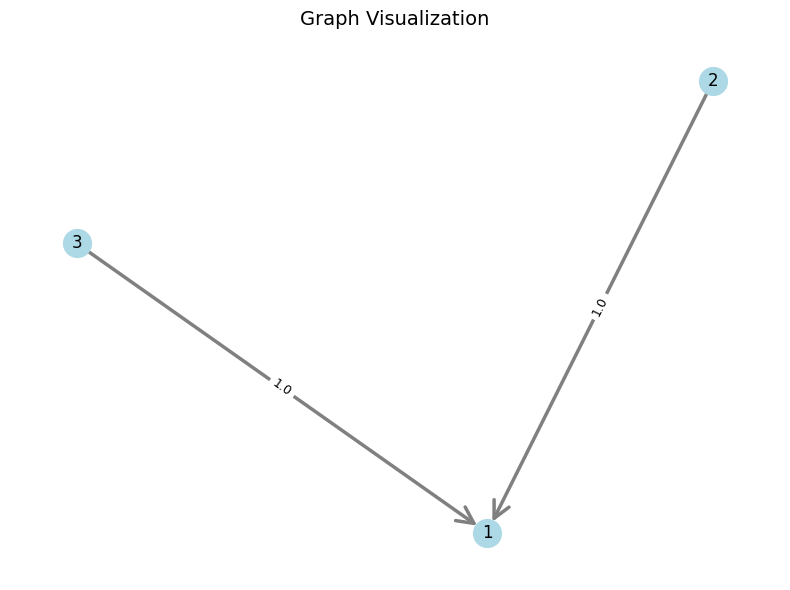

[2025-12-04 11:10:20,854] [INFO] All 1 tests passed for <__main__.DirectedGraphDFS object at 0x71a27f5cb680>.
[2025-12-04 11:10:20,854] [INFO] All 1 tests passed for <__main__.DirectedGraphBFS object at 0x71a27f924ad0>.


In [7]:
adj_graph_3 = AdjacencyListDirectedGraph(
    {
        GraphNode(1): {},
        GraphNode(2): {GraphNode(1): 1.0},
        GraphNode(3): {GraphNode(1): 1.0},
    }
)

if __name__ == "__main__":
    adj_graph_3.visualise()

    # DFS
    Validor(DirectedGraphDFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_3,
            root=GraphNode(3),
            expected_output=[
                GraphNode(3),
                GraphNode(1),
            ],
            description="Directional DFS",
        )
    ).run()

    # BFS
    Validor(DirectedGraphBFS()).add_case(
        build_test_adj_graph(
            graph=adj_graph_3,
            root=GraphNode(3),
            expected_output=[
                GraphNode(3),
                GraphNode(1),
            ],
            description="Directional BFS",
        )
    ).run()

## Complexity

| Graph Representation          | Traversal Method | Time Complexity | Space Complexity          |
|-------------------------------|------------------|-----------------|--------------------------|
| Adjacency List                 | DFS              | $O(V + E)$        | $O(V)$ (visited + recursion stack) |
| Adjacency List                 | BFS              | $O(V + E)$        | $O(V$) (visited + queue)   |
| Adjacency Matrix              | DFS              | $O(V^2)$          | $O(V)$                     |
| Adjacency Matrix              | BFS              | $O(V^2)$          | $O(V)$                     |

- $V$: Number of vertices (nodes)
- $E$: Number of edges

**Notes:**
- For adjacency list, both DFS and BFS have linear complexity relative to nodes and edges.
- For adjacency matrix, time complexity is quadratic due to scanning all matrix entries.
